*CREDIT DEFAULT PREDICTION:* **Part III - DeepLearning**

## Acknowledgement

Predicting Loan Defaults using Deep Learning with Keras & Tensorflow Sarathi Balakrishnan

Sarathi Balakrishnan
Sarathi Balakrishnan
Entrepreneur & tech enthusiast with hands on experience in variety of technology from private cloud architecting to Bigdata, Analytics, AI and ML.

https://sarathi-tech.medium.com/predicting-loan-defaults-using-deep-learning-with-keras-tensorflow-78a15b196e65

And, here is some information on how to use Dropouts
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

And the nature of neural networks: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

## Begin

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

Download balanced sample created in part I

In [ ]:
df = pd.read_csv('https://github.com/coyoacan/abc/blob/99ae3b10000a039739a129c49a8112ed17e4293b/DefaultPrediction_balanced_sample_2007_2018.zip?raw=true', compression='zip', encoding='utf-8')

In [ ]:
from timeit import default_timer # measure processing time :)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

Some transformations again

In [ ]:
new_cols = [col for col in df.columns if col != 'loan_status'] + ['loan_status']
df = df[new_cols] # new column order where target appears last
df = pd.concat([
        df.select_dtypes([], ['object']),
        df.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33040 entries, 0 to 33039
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             33040 non-null  int64   
 1   int_rate              33040 non-null  float64 
 2   installment           33040 non-null  float64 
 3   annual_inc            33040 non-null  float64 
 4   dti                   33031 non-null  float64 
 5   open_acc              33040 non-null  int64   
 6   pub_rec               33040 non-null  int64   
 7   revol_bal             33040 non-null  int64   
 8   revol_util            33022 non-null  float64 
 9   total_acc             33040 non-null  int64   
 10  mort_acc              31900 non-null  float64 
 11  pub_rec_bankruptcies  33029 non-null  float64 
 12  term                  33040 non-null  category
 13  sub_grade             33040 non-null  category
 14  emp_title             30536 non-null  category
 15  em

In [ ]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2022)

attributes_number = Pipeline(steps=[
    ('null_replacement', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler())
])

attributes_category = Pipeline(steps=[
    ('null_replacement', SimpleImputer(strategy='most_frequent')),
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1))
])

columns_number = X_train.select_dtypes(include='number').columns.to_list()
columns_category = X_train.select_dtypes(include='category').columns.to_list()

attributes_preprocess = ColumnTransformer(transformers=[
    ('number', attributes_number, columns_number),
    ('category', attributes_category, columns_category)
])

# Prepare Y set before using the model
label_encoding = LabelEncoder()
y_train = label_encoding.fit_transform(y_train)
y_test = label_encoding.fit_transform(y_test)

# Prepare X set before using the model in case we need it
pX_train = attributes_preprocess.fit_transform(X_train)
pX_test = attributes_preprocess.fit_transform(X_test)

## Building our Model

In [ ]:
# Normal tensorflow
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# following seeds help us to diminish randomness in our NNs
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
from scikeras.wrappers import KerasClassifier
def create_model():
  model = Sequential()

  model.add(Dense(18, input_shape=(22,), activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', 
          loss='binary_crossentropy', 
          metrics=['accuracy'])
  return model

network_model = KerasClassifier(model=create_model, epochs=200, batch_size=150, verbose=0)

Next piece of code takes about 3 minutes to complete. Model with no dropouts, I'm using a wrapper (KerasClassifier) to use scikit-learn pipeline with a Keras Model. Before using KerasClassifier intall SciKeras in your environment. Advise: run this part a few times before selecting the right model. Our friend, Jason Brownlee would say "Neural network algorithms are stochastic. This means they make use of randomness, such as initializing to random weights, and in turn the same network trained on the same data can produce different results."

mean accuracy (train):  0.6488239363542027
mean accuracy (test):  0.6078490718321227
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      4978
           1       0.65      0.47      0.54      4934

    accuracy                           0.61      9912
   macro avg       0.62      0.61      0.60      9912
weighted avg       0.62      0.61      0.60      9912



<Figure size 640x480 with 0 Axes>

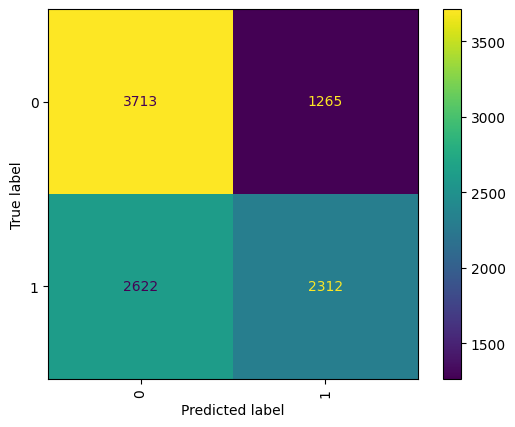

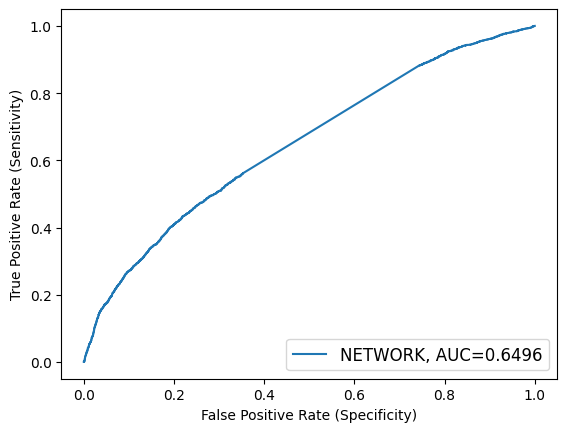

In [ ]:
#set up plotting area
plt.figure(0).clf()

# fit Decision network classifier
model_pipeline = Pipeline(steps=[
                                  ('preprocesss', attributes_preprocess),
                                  ('model', network_model)                                 
])


model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("mean accuracy (train): ", model_pipeline.score(X_train,y_train))
print("mean accuracy (test): ", model_pipeline.score(X_test,y_test))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, xticks_rotation='vertical')

plt.show()

y_pred = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NETWORK, AUC="+str(auc))
#add legend
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (Specificity)')
plt.legend(loc=4,prop={'size': 12})

In [ ]:
# Make a Copy of Original model prediction for y_train
y_train_predicted = model_pipeline.predict(X_train)

## Handling False Positives

I took some ideas from this girl Sanskriti Singh
https://medium.com/@Sanskriti.Singh/an-emphasis-on-the-minimization-of-false-negatives-false-positives-in-binary-classification-9c22f3f9f73

"To minimize the number of False Negatives (FN) or False Positives (FP) we can also retrain a model on the same data with slightly different output values more specific to its previous results. This method involves taking a model and training it on a dataset until it optimally reaches a global minimum. If we were trying to minimize False Negatives, we would take some amount (independent variable) of the False Positives on the training data and change their real value to 1."

In [ ]:
# Check lengths, both should be the same
print("Y train predicted length is: ", len(y_train_predicted))
print("Original Y train length is: ", len(y_train))

Y train predicted length is:  23128
Original Y train length is:  23128


In [ ]:
# zip both lists for quick comparison
c = list(zip(y_train,y_train_predicted))
# get positions where y_train is 0 and y_train predicted is 1
case_list = [i for i, x in enumerate(c) if x==(1,0)]

In [ ]:
# import random 
import random

In [ ]:
# randomly select 20% of total cases
case_list_shortened = random.sample(case_list,round(len(case_list)*0.2))

In [ ]:
new_y_train = y_train.copy() # copy old y_train
for x in case_list_shortened:
    new_y_train[x] = 0

In [ ]:
for i in range(10): # Validation
  print("Change validation #",i,"(y_train vs new_y_train) ", 
        y_train[case_list_shortened[i]],new_y_train[case_list_shortened[i]])

Change validation # 0 (y_train vs new_y_train)  1 0
Change validation # 1 (y_train vs new_y_train)  1 0
Change validation # 2 (y_train vs new_y_train)  1 0
Change validation # 3 (y_train vs new_y_train)  1 0
Change validation # 4 (y_train vs new_y_train)  1 0
Change validation # 5 (y_train vs new_y_train)  1 0
Change validation # 6 (y_train vs new_y_train)  1 0
Change validation # 7 (y_train vs new_y_train)  1 0
Change validation # 8 (y_train vs new_y_train)  1 0
Change validation # 9 (y_train vs new_y_train)  1 0


Re-train and look at the results

mean accuracy (train):  0.6122881355932204
mean accuracy (test):  0.5900928167877321
              precision    recall  f1-score   support

           0       0.56      0.81      0.67      4978
           1       0.66      0.37      0.47      4934

    accuracy                           0.59      9912
   macro avg       0.61      0.59      0.57      9912
weighted avg       0.61      0.59      0.57      9912



<Figure size 640x480 with 0 Axes>

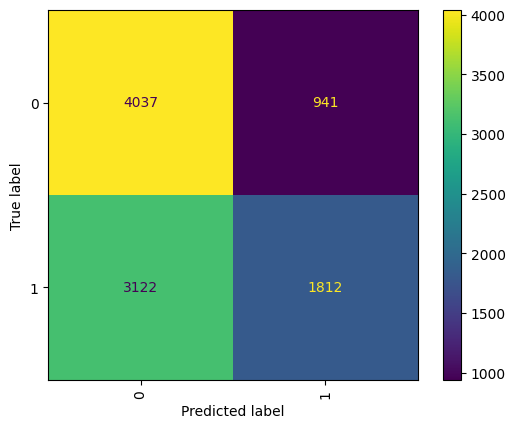

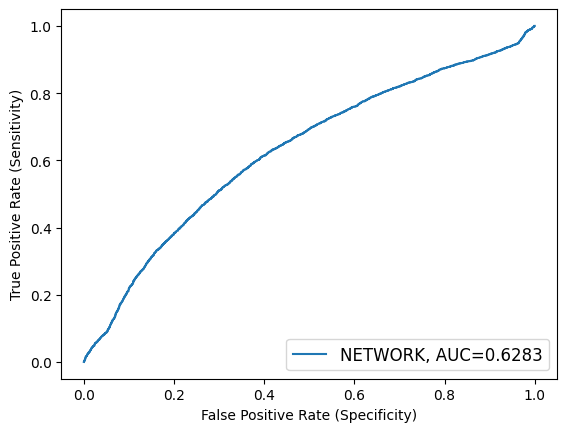

In [ ]:
#set up plotting area
plt.figure(0).clf()

# fit Decision network classifier
model_pipeline = Pipeline(steps=[
                                  ('preprocesss', attributes_preprocess),
                                  ('model', network_model)                                 
])


model_pipeline.fit(X_train, new_y_train) # use new_y_train here!!!!!

y_pred = model_pipeline.predict(X_test)
print("mean accuracy (train): ", model_pipeline.score(X_train,y_train))
print("mean accuracy (test): ", model_pipeline.score(X_test,y_test))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, xticks_rotation='vertical')

plt.show()

y_pred = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="NETWORK, AUC="+str(auc))
#add legend
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (Specificity)')
plt.legend(loc=4,prop={'size': 12})